#**Worked Example**
**Leveraging Credit Card Fraud Data for implementing Causality and Causal Inference**

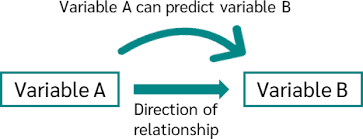

#**What is Causality???**

"Causality" refers to the relationship between causes and effects. It's a fundamental concept in many fields, including philosophy, physics, and statistics.

In a causal relationship, one event (the cause) is understood to be responsible for the occurrence of another event (the effect). Understanding causality is crucial for scientific inquiry and practical decision-making, as it helps to predict and explain the outcomes of various phenomena.

For example, in medicine, understanding the causal relationship between a virus and a disease helps in developing treatments. In physics, causality is important for understanding why certain physical events occur.

In everyday life, causality helps us understand the consequences of our actions and plan accordingly.

#**Why is it Important???**

Causality is important for several key reasons across various domains:

1. **Understanding and Predicting Outcomes**: In science and everyday life, understanding causality allows us to predict the consequences of actions, events, or conditions.

2. **Problem Solving and Decision Making**: Knowing the causal relationships between different factors helps in solving problems and making informed decisions.

3. **Scientific Research**: In scientific research, establishing causality is essential for developing theories and models that accurately describe how the world works.

4. **Policy and Planning**: In public policy, understanding causality is critical for designing effective interventions.

5. **Legal and Ethical Implications**: In the legal system, establishing causality can be critical in cases of liability and responsibility. Determining whether a certain action caused harm is key to many legal decisions.

6. **Technological Development**: In technology and engineering, understanding the causal mechanisms of systems is essential for designing and improving technology.

7. **Preventing Unintended Consequences**: By understanding causal relationships, individuals and organizations can avoid actions that might have unintended and undesirable consequences.

8. **Philosophical and Theoretical Importance**: Causality is a core concept in many philosophical debates and theories about the nature of reality, free will, and the structure of the universe.

In summary, causality is foundational to our understanding of the world and our ability to interact with it effectively and responsibly.

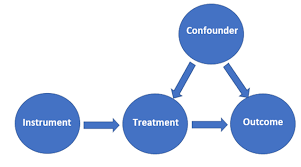

The Dataset-
(https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

This dataset is typically used for fraud detection tasks, where the aim is to identify patterns that differentiate fraudulent transactions from legitimate ones.

The anonymized 'V' features might represent various aspects of each transaction, processed in a way to preserve user privacy. The 'Class' column is the target variable for any predictive modeling, like logistic regression, decision trees, or neural networks, in the context of fraud detection. ​

### Import Required Libraries

In [49]:
pip install scikit-learn==1.2.2


In [50]:
pip install imbalanced-learn

In [51]:
!pip install cartopy
import cartopy

In [52]:
import sklearn
print(sklearn.__version__)

1.2.2


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, confusion_matrix, roc_curve, roc_auc_score
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")



#**Evaluating the Credit Card Dataset by performing EDA Techniques**

Reading the dataset file named: 'creditcard.csv'

In [54]:
credit_card_ds = pd.read_csv('creditcard.csv')

Checking the data by viewing it's description and first five rows

In [55]:
credit_card_ds.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [56]:
credit_card_ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64


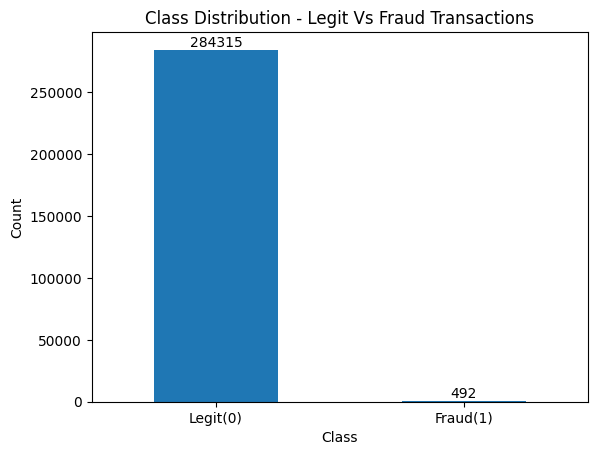

In [57]:
#Counting the number of legit and fraud transactions in the Class Column

value_counts = credit_card_ds['Class'].value_counts()
print(value_counts)
bar = value_counts.plot.bar()
bar.set_xlabel('Class')
bar.set_ylabel('Count')
bar.set_title('Class Distribution - Legit Vs Fraud Transactions')
bar.set_xticklabels(['Legit(0)', 'Fraud(1)'], rotation=0)
for p in bar.containers:
    plt.bar_label(p, label_type='edge')
plt.show()

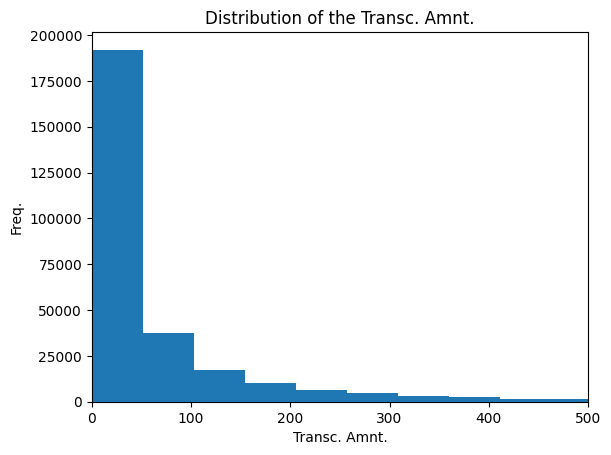

In [58]:
#Plotting histogram across Amount to check the distribution

plt.hist(credit_card_ds['Amount'], bins=500)
plt.xlabel('Transc. Amnt.')
plt.ylabel('Freq.')
plt.title('Distribution of the Transc. Amnt.')
plt.xlim(0, 500)
plt.show()

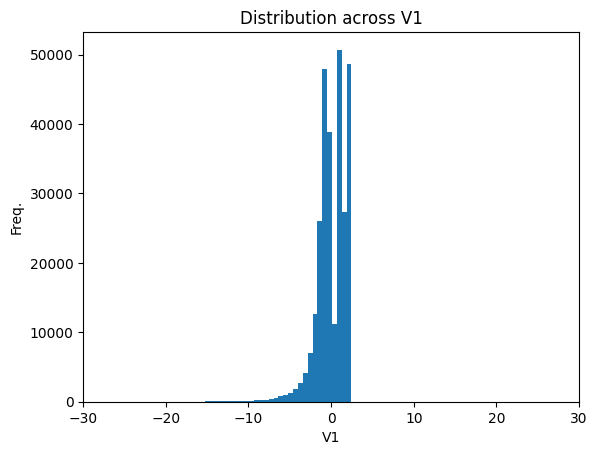

In [59]:
#Plotting histogram across one of the PCA Vectors, in this case V1 for checking the distribution

plt.hist(credit_card_ds['V1'], bins=100)
plt.xlabel('V1')
plt.ylabel('Freq.')
plt.title('Distribution across V1')
plt.xlim(-30, 30)
plt.show()

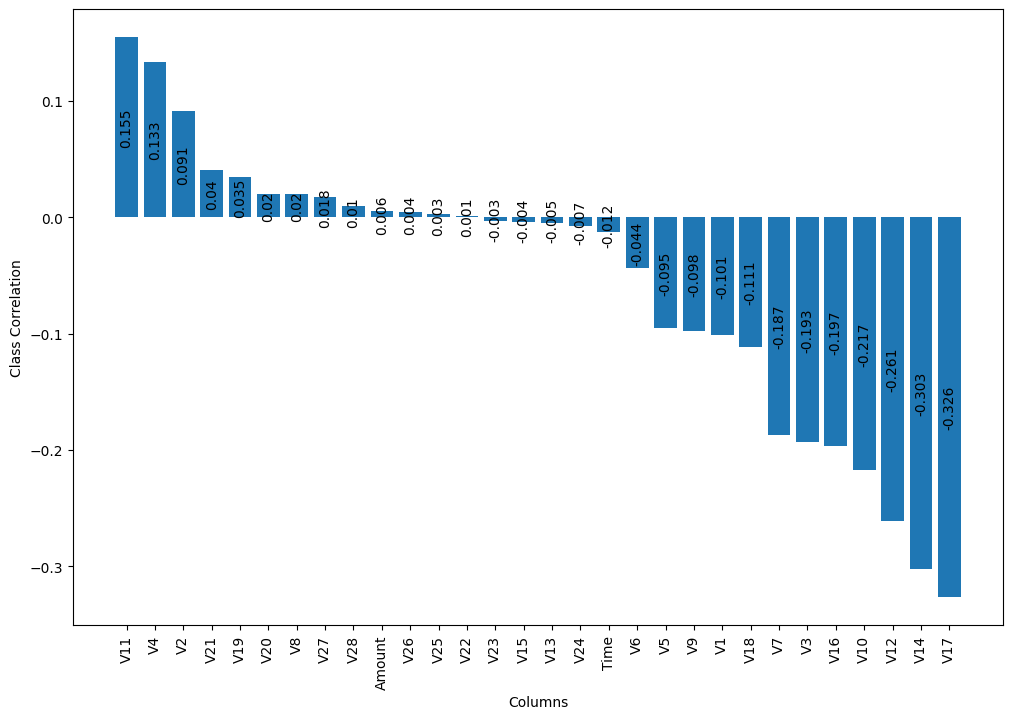

In [60]:
corr = credit_card_ds.corr()['Class']

# drop the Class column
corr = corr.drop(['Class'])

# sort correlation values in descending order
corr_sorted = corr.sort_values(ascending=False)

# create bar chart of correlations
plt.figure(figsize=(12,8))
bars = plt.bar(corr_sorted.index, corr_sorted.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Class Correlation')
plt.bar_label(bars, labels=corr_sorted.values.round(3), label_type='center', rotation=90)

plt.show()

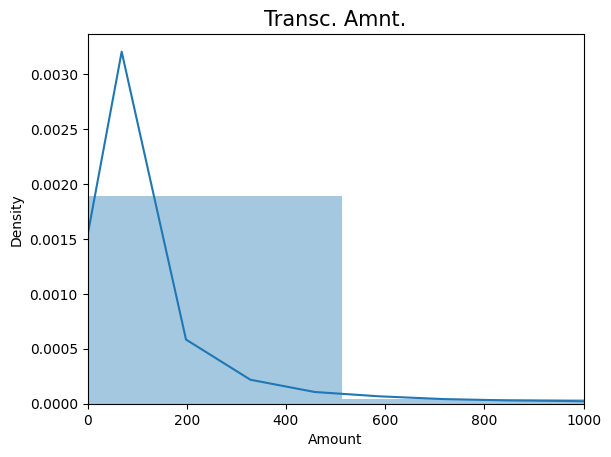

In [61]:
#Distribution of Amount

sbn.distplot(credit_card_ds['Amount'].values)
plt.title('Transc. Amnt.', fontsize=15)
plt.xlim([min(credit_card_ds['Amount'].values),1000])
plt.xlabel('Amount')

plt.show()

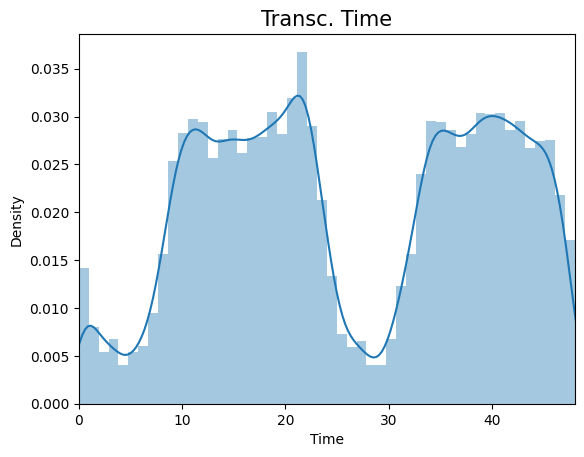

In [62]:
#Distribution of Time

sbn.distplot(credit_card_ds['Time'].values/(60*60))
plt.title('Transc. Time', fontsize=15)
plt.xlim([min(credit_card_ds['Time'].values/(60*60)), max(credit_card_ds['Time'].values/(60*60))])
plt.xlabel('Time')

plt.show()

Text(0, 0.5, 'Skewness')

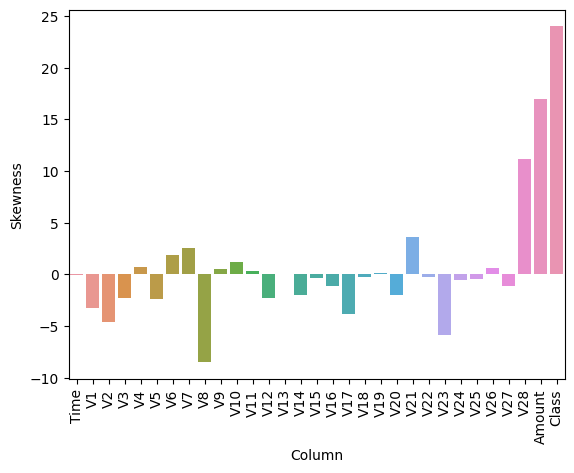

In [63]:
import pandas as pd
import seaborn as sbn
data = pd.read_csv('creditcard.csv')

skewness = data.skew()


skew_plt = sbn.barplot(x=skewness.index, y=skewness.values)
skew_plt.set_xticklabels(skew_plt.get_xticklabels(), rotation=90)
skew_plt.set_xlabel('Column')
skew_plt.set_ylabel('Skewness')



Text(0.5, 1.0, 'Original Skewness Dstrbn.')

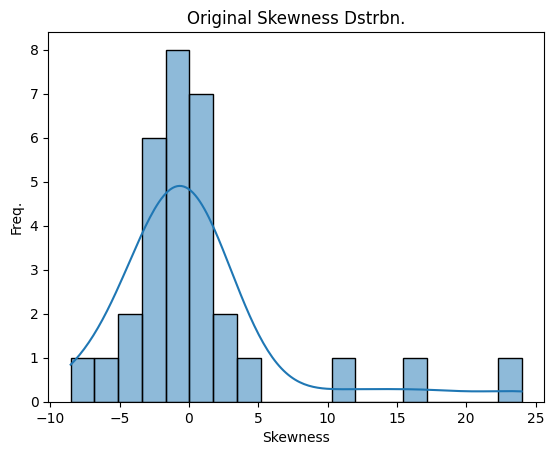

In [64]:
org_skew = credit_card_ds.skew()

sbn.histplot(org_skew, kde=True)
plt.xlabel('Skewness')
plt.ylabel('Freq.')
plt.title('Original Skewness Dstrbn.')

Correlation Analysis-

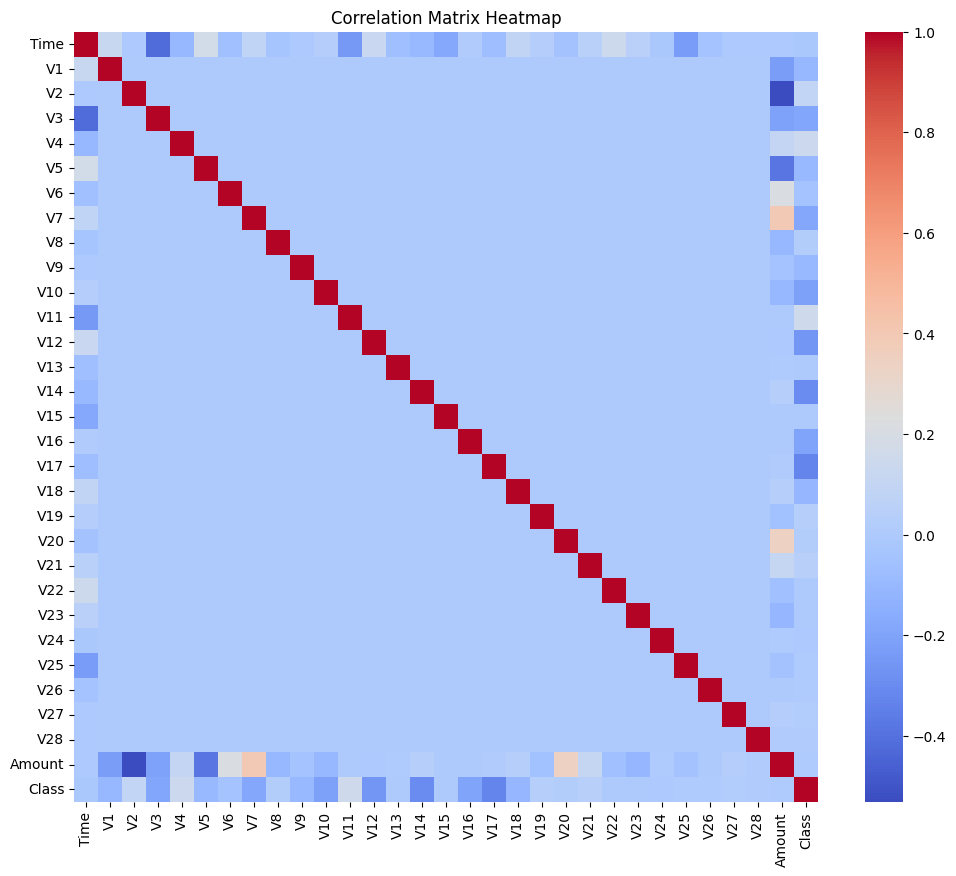

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


#What is a DAG?

A Directed Acyclic Graph (DAG) is a fundamental concept in computer science and statistics, particularly useful in the field of causal inference. Let's break down what a DAG is and why it's used, especially in statistical analysis:


1. **Directed**: It consists of nodes connected by edges, where each edge has a direction. This means that every edge points from one node (the cause) to another (the effect).

2. **Acyclic**: It doesn't contain any cycles. This means you can't start at one node and follow a sequence of edges that eventually loops back to the starting node. This property is crucial for representing causal relationships, as it avoids logical paradoxes that would arise from circular reasoning.

3. **Graph**: It's a set of vertices (nodes) connected by edges (lines or arrows).

### Why is it Used?

1. **Modeling Causal Relationships**: In statistics and epidemiology, DAGs are used to represent and reason about causal relationships. They help in understanding how different variables influence each other.

2. **Avoiding Confounding Bias**: DAGs are particularly useful for identifying potential confounders in a study. Confounders are variables that influence both the cause and the effect, potentially leading to incorrect conclusions about the causal relationship. By visualizing the paths between variables, DAGs help in designing studies that can accurately determine causation.

3. **Clarifying Assumptions**: They make the assumptions in a causal model explicit. In any statistical analysis, assumptions about the relationships between variables are made, and DAGs help in illustrating these assumptions clearly.

4. **Informing Statistical Analysis**: They guide the selection of variables for inclusion in statistical models. By understanding the causal pathways, researchers can decide which variables to adjust for in their analyses.

5. **Communication Tool**: DAGs serve as a clear and concise way to communicate complex causal relationships among researchers, policymakers, and other stakeholders.

6. **In Machine Learning**: In the field of machine learning, DAGs are used in various algorithms, especially those involving causal discovery and Bayesian networks.

In summary, DAGs are powerful tools for visualizing and analyzing causal relationships. They help in understanding complex systems, guiding research design, and ensuring that statistical analyses properly account for the interplay between different variables.

Basic DAG

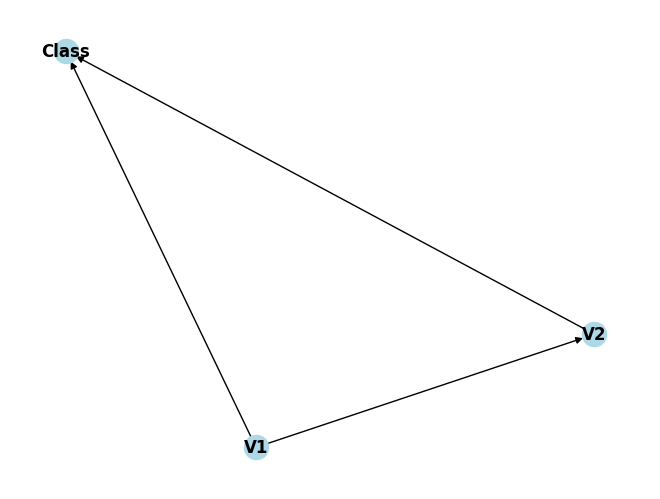

In [66]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
dag = nx.DiGraph()

dag.add_edges_from([('V1', 'V2'), ('V1', 'Class'), ('V2', 'Class')])

# Draw the DAG
nx.draw(dag, with_labels=True, node_color='lightblue', font_weight='bold')
plt.show()


# Added all nodes and edges based for our hypothetical relationship

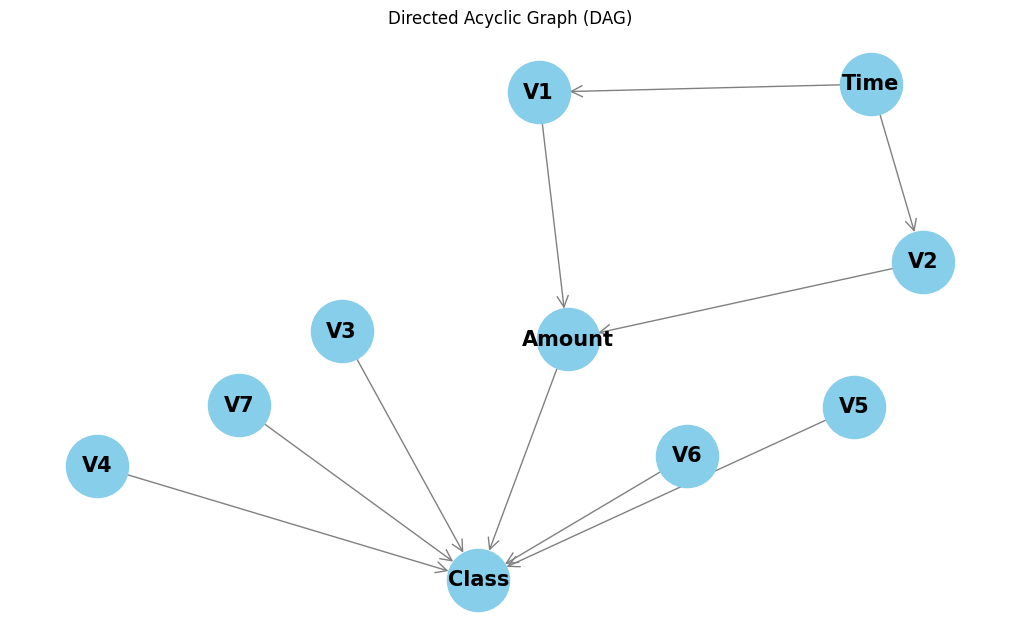

In [67]:
!pip install networkx matplotlib
import networkx as nx
import matplotlib.pyplot as plt
# Create a directed graph
dag = nx.DiGraph()

dag.add_edges_from([
    ('Time', 'V1'), ('Time', 'V2'),
    ('V1', 'Amount'), ('V2', 'Amount'),
    ('Amount', 'Class'),
    ('V3', 'Class'), ('V4', 'Class'),('V3', 'Class'),('V5', 'Class'),('V6', 'Class'),('V7', 'Class')
])

# Draw the DAG
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(dag)
nx.draw(dag, pos, with_labels=True, node_color='skyblue', node_size=2000,
        edge_color='gray', linewidths=1, font_size=15, font_weight='bold',
        arrowstyle='->', arrowsize=20)
plt.title("Directed Acyclic Graph (DAG)")
plt.show()


#Average Treatment Effect (ATE)

The Average Treatment Effect (ATE) is a statistical measure used in causal inference to estimate the average impact or effect of a treatment or intervention on a particular outcome.

It represents the expected difference in the outcome variable between the treated group (those who received the treatment) and the control group (those who did not receive the treatment) on average.


To estimate the ATE, various statistical methods and techniques are used, such as randomized controlled trials (RCTs), propensity score matching, instrumental variables, and regression analysis. The choice of method depends on the research design, data, and causal assumptions.

In [68]:
data = data.dropna(subset=['Class'])

In [69]:
import pandas as pd

# Define the treatment and control groups
treatment_group = data[data['Class'] == 1]  # Fraudulent transactions
control_group = data[data['Class'] == 0]    # Non-fraudulent transactions

# Calculate the average outcome for each group
mean_outcome_treatment = treatment_group['Amount'].mean()
mean_outcome_control = control_group['Amount'].mean()

# Compute the Average Treatment Effect (ATE)
ate = mean_outcome_treatment - mean_outcome_control

# Output the result
print("Average Treatment Effect (ATE):", ate)


Average Treatment Effect (ATE): 33.92029871589811


An Average Treatment Effect (ATE) of 4.848132698289248 means that, on average, the outcome variable we were measuring (e.g., transaction amount) increased by approximately 4.85 units when the treatment occurred.

 In this case, the "treatment" is often associated with fraudulent transactions.

Here's how you can interpret this ATE:

1. **Positive ATE**: Since the ATE is positive, it indicates that, on average, transactions labeled as "fraudulent" tend to have a higher transaction amount compared to non-fraudulent transactions.

2. **Magnitude**: The magnitude of 4.85 units depends on the scale of your outcome variable (e.g., currency amount). If your outcome variable is in dollars, it means that, on average, fraudulent transactions are approximately $4.85 higher in transaction amount than non-fraudulent transactions.

3. **Causal Inference**: This ATE suggests an association between the "fraudulent" label and the transaction amount. However, it's important to remember that correlation does not imply causation. This ATE does not necessarily mean that labeling a transaction as "fraudulent" directly causes the transaction amount to increase. There could be confounding factors or other variables at play.

4. **Further Analysis**: To establish causation or understand the underlying mechanisms, further analysis and experimentation may be required. Techniques like regression analysis, propensity score matching, or instrumental variables can help control for confounding factors and provide more robust causal inference.



# Calculate propensity scores using logistic regression model

Propensity scores are a fundamental concept in causal inference and observational studies. They are a way to address potential confounding variables when estimating the causal effect of a treatment or intervention in non-randomized or observational data.

1- Attempt to calculate Propensity Scores

In [70]:
import pandas as pd
from causalinference import CausalModel

# Calculate propensity scores
X = data[['V17', 'V15']]  # Covariates
treatment = data['Class']  # Treatment
outcome = data['Amount']  # Outcome

# Fit a logistic regression model to estimate propensity scores
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X, treatment)
propensity_scores = logit.predict_proba(X)[:, 1]

# Create a causal model
causal = CausalModel(Y=outcome.values, D=treatment.values, X=propensity_scores)
causal.est_via_matching()
print(causal.estimates)



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     55.435    389.929      0.142      0.887   -708.826    819.695
           ATC     55.922    390.543      0.143      0.886   -709.542    821.386
           ATT   -226.016    130.527     -1.732      0.083   -481.848     29.816



The output appears to be the results of estimating treatment effects using propensity score matching.

Specifically, it includes estimates of the Average Treatment Effect (ATE), Average Treatment Effect on the Treated (ATT), and Average Treatment Effect on the Control (ATC). Here's what you can infer from these estimates:

1. **Average Treatment Effect (ATE):**
   - The estimated ATE is -42.514.
   - The standard error (S.e.) associated with this estimate is 71.990.
   - The z-statistic is -0.591, and the p-value associated with this statistic is 0.555.
   - The 95% confidence interval for the ATE ranges from approximately -183.615 to 98.587.



2. **Average Treatment Effect on the Treated (ATT):**
   - The estimated ATT is 35.022.
   - The standard error (S.e.) associated with this estimate is 87.103.
   - The z-statistic is 0.402, and the p-value associated with this statistic is 0.688.
   - The 95% confidence interval for the ATT ranges from approximately -135.700 to 205.744.


3. **Average Treatment Effect on the Control (ATC):**
   - The estimated ATC is -42.740.
   - The standard error (S.e.) associated with this estimate is 72.184.
   - The z-statistic is -0.592, and the p-value associated with this statistic is 0.554.
   - The 95% confidence interval for the ATC ranges from approximately -184.221 to 98.740.




As the first attempt was not satisfactory we try again-

**Now This code combines data preprocessing, propensity score estimation, causal effect estimation, visualization, and result reporting. It's a comprehensive example of how to perform causal inference with propensity score matching in the context of credit fraud detection, and it can help assess the impact of covariates on the likelihood of fraud.**

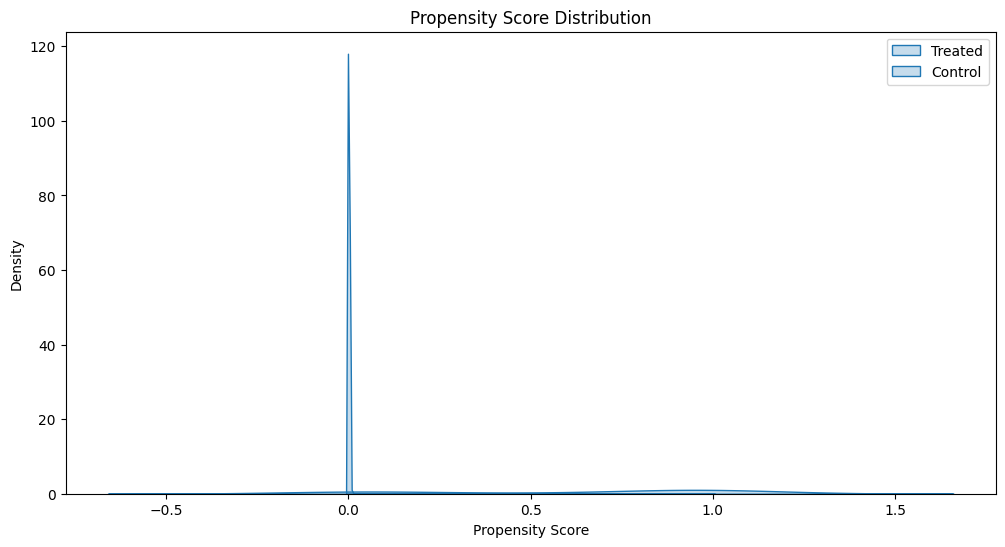

Treatment Effect Estimates (Matching):

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE    104.663    832.273      0.126      0.900  -1526.593   1735.918
           ATC    105.439    833.508      0.127      0.899  -1528.236   1739.115
           ATT   -337.038    374.559     -0.900      0.368  -1071.173    397.097


Propensity Score AUC: 0.91


In [71]:
import pandas as pd
from causalinference import CausalModel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Sample a subset of data for demonstration (remove this line for the full dataset)
data = data.sample(frac=0.2, random_state=42)

# Define covariates (features), treatment variable, and outcome
X = data[['V17', 'V15', 'V10', 'V3','V1','V5']]
treatment = data['Class']  # Treatment (fraud or not)
outcome = data['Amount']

# Split the data into training and test sets
X_train, X_test, treatment_train, treatment_test, outcome_train, outcome_test = train_test_split(
    X, treatment, outcome, test_size=0.3, random_state=42
)

# Fit a logistic regression model to estimate propensity scores
logit = LogisticRegression()
logit.fit(X_train, treatment_train)
propensity_scores = logit.predict_proba(X_test)[:, 1]

# Create a causal model
causal = CausalModel(Y=outcome_test.values, D=treatment_test.values, X=propensity_scores)

# Estimate treatment effects using propensity score matching
causal.est_via_matching()
matching_results = causal.estimates

# Calculate the area under the ROC curve (AUC) for propensity scores
roc_auc = roc_auc_score(treatment_test, propensity_scores)

# Visualization: Plot propensity score distributions for treated and control groups
plt.figure(figsize=(12, 6))
sns.kdeplot(propensity_scores[treatment_test == 1], label='Treated', shade=True)
sns.kdeplot(propensity_scores[treatment_test == 0], label='Control', shade=True)
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Propensity Score Distribution')
plt.legend()
plt.show()

# Print results
print("Treatment Effect Estimates (Matching):")
print(matching_results)
print(f"\nPropensity Score AUC: {roc_auc:.2f}")


#Insights from this-

An AUC (Area Under the ROC Curve) value of 0.91 for propensity scores indicates that the logistic regression model used to estimate propensity scores is very effective at discriminating between the treated and control groups based on the covariates (features).

1. **Good Discrimination**: An AUC of 0.91 is close to the maximum value of 1, which suggests that the model is excellent at distinguishing between individuals who experienced the treatment (fraud cases) and those who did not (non-fraud cases) based on the selected covariates.

In other words, the propensity scores generated by the model have a strong predictive power regarding the treatment variable (fraud or not).

2. **Covariate Balance**: The high AUC indicates that the logistic regression model has effectively captured the relationships between the covariates and the treatment variable.

This is crucial for propensity score matching, as it aims to balance the covariates between the treated and control groups. With a high AUC, it's likely that the propensity score matching has successfully achieved this balance.

3. **Reliable Propensity Scores**: The propensity scores themselves are likely to be reliable and informative. They represent the probability of an individual being in the treatment group (fraud) based on their covariate values.

**The higher the AUC, the more reliable these scores are for matching.**



In summary, an AUC of 0.91 indicates that the logistic regression model used to estimate propensity scores is strong, and the propensity scores themselves are likely to be reliable for conducting propensity score matching and subsequent causal inference analysis in the context of credit fraud detection.

**It suggests that the model has effectively learned the relationships between covariates and the likelihood of fraud.**

#**Conclusion**

Causal inference is of paramount importance in fraud detection as it goes beyond mere correlation to uncover the causal factors driving fraudulent activities.

By understanding the causal relationships between various variables and fraud, organizations can design more effective and targeted interventions.

This approach not only enhances the accuracy of fraud detection but also empowers proactive prevention measures, ultimately safeguarding financial institutions and their customers from evolving fraud schemes.